# HW1 CSE 152 

In [239]:
%matplotlib auto
import numpy as np
from imageio import imread
from drawLine import drawLine
from clickPoints import clickPoints
from matplotlib import pyplot as plt

Using matplotlib backend: MacOSX


Function below takes in points from the left and right images with shape: (2, N) to calculate the fundamental matrix

<img src="8pointalg.jpg" width=450>

In [317]:
def computeF(xl, xr):
    
    A = np.hstack([xl[0, :, np.newaxis] * xr[0, :, np.newaxis],
                   xl[1, :, np.newaxis] * xr[0, :, np.newaxis],
                   xr[0, :, np.newaxis],
                   xl[0, :, np.newaxis] * xr[1, :, np.newaxis],
                   xl[1, :, np.newaxis] * xr[1, :, np.newaxis],
                   xr[1, :, np.newaxis],
                   xl[0, :, np.newaxis], 
                   xl[1, :, np.newaxis],
                   np.ones(shape=(len(xl[0]), 1))])
    
    (U, D, V) = np.linalg.svd(A)
    
    F = V[np.argmin(D)].reshape((3, 3))
    
    # Enforcing rank 2 constraint by making the smallest singular value 0
    (U_, D_, V_) = np.linalg.svd(F)
    
    D_[np.argmin(D_)] = 0
    D_ = np.diag(D_)
    
    F = np.dot(np.dot(U_, D_), V_)

    return F


F = computeF(xl.T, xr.T)
F

array([[ 5.26814418e-06, -3.65228711e-05,  4.39451820e-03],
       [ 7.23585607e-06, -3.55760446e-05,  2.15354214e-03],
       [-2.78651763e-03,  1.43411665e-02, -9.99881300e-01]])

## Drawing the epipolar lines

Function below takes in points and their respective images with shape: (2, N) to calculate their epipolar lines

In [322]:
def epipolar(xl , xr , l , r):
    F = computeF(xl.T, xr.T)

    xl = np.hstack((xl, np.ones((10, 1))))
    xr = np.hstack((xr, np.ones((10, 1))))
    
    leftlines = np.array([np.dot(F, pt) for pt in xl])
    rightlines = np.array([np.dot(F.T, pt) for pt in xr])
    
    return F, leftlines, rightlines

In [327]:
F, left, right = epipolar(xl, xr, l, r)

[[ 1.98776216e-03 -7.25996991e-05 -9.51713465e-02]
 [ 2.39747880e-03  5.41565793e-04 -3.29426888e-01]
 [-3.56101173e-04 -2.10667131e-03  7.40215513e-01]
 [-1.69846748e-03 -3.41462816e-03  1.26744576e+00]
 [-9.51797485e-04 -2.90863066e-03  1.04976216e+00]
 [-2.36868541e-03 -4.28917722e-03  1.60625427e+00]
 [ 3.14701420e-03  1.37081325e-03 -6.57565897e-01]
 [ 3.26070570e-03  1.58109090e-03 -7.36165937e-01]
 [ 2.13658287e-03  5.86424219e-04 -3.28988885e-01]
 [ 1.94654674e-03  3.06465048e-04 -2.22009166e-01]]
[[-1.79277832e-03  8.58277312e-03 -4.71918032e-01]
 [-1.55527420e-03  6.62501379e-03 -1.90982481e-01]
 [-5.86826719e-04  1.41825467e-03  2.15742400e-01]
 [-7.50498649e-04  2.99133638e-03 -3.74517085e-02]
 [-3.84692478e-04  1.19674224e-03  7.03712351e-02]
 [-2.50795978e-04 -2.24034109e-04  3.13130615e-01]
 [-8.77246138e-05 -1.81189460e-03  5.70864796e-01]
 [-7.50744111e-04  1.40458478e-03  3.85071201e-01]
 [-1.03272077e-03  3.00767926e-03  2.43474661e-01]
 [-1.69466432e-03  6.94192165e

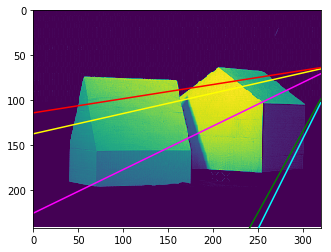

In [338]:
plt.imshow(l)
drawLine(left[1], l, 'yellow')
drawLine(left[3], l, 'cyan')
drawLine(left[5], l, 'green')
drawLine(left[7], l, 'magenta')
drawLine(left[9], l, 'red')

IndexError: too many indices for array

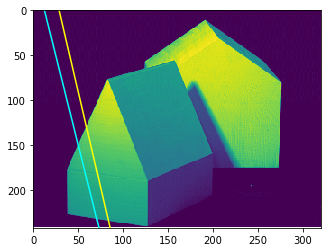

In [337]:
plt.imshow(r)
drawLine(right[1], r, 'yellow')
drawLine(right[3], r, 'cyan')
drawLine(right[5], r, 'green')
drawLine(right[7], r, 'magenta')
drawLine(right[9], r, 'red')

Testing with a pair of images

In [195]:
l = imread('blocks1.gif')
r = imread('blocks2.gif')

In [259]:
xl = clickPoints(l, 10, 1, 1)
xr = clickPoints(r, 10, 1, 1)